# Random

In [40]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

### random vs numpy

Time to compute numbers from 0 to 1 from a uniform distribution using random and numpy

In [57]:
size = list(range(1, 1000, 10))

In [58]:
random_times = []
for i in size:
    start_time = datetime.now()
    random.uniform(0, 1)
    random_times.append(((datetime.now() - start_time).microseconds)*i)
np_times = []
for i in size:
    start_time = datetime.now()
    np.random.uniform(size = i)
    np_times.append((datetime.now() - start_time).microseconds)

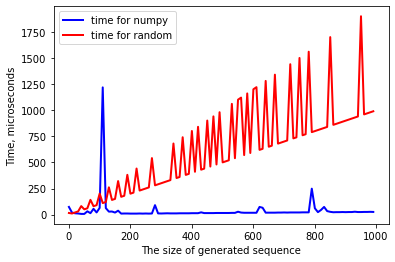

In [59]:
plt.figure()
plt.xlabel('The size of generated sequence')
plt.ylabel('Time, microseconds')
plt.plot(size, np_times, color='blue', lw=2, label = 'time for numpy')
plt.plot(size, random_times, color='red', lw=2, label = 'time for random')
plt.legend()
plt.show()

for big sizes

In [44]:
big_size = [1, 10, 100, 1000, 10000, 100000, 1000000]
random_times = []
for i in big_size:
    start_time = datetime.now()
    random.uniform(0, 1)
    random_times.append(((datetime.now() - start_time).microseconds)*i)
np_times = []
for i in big_size:
    start_time = datetime.now()
    np.random.uniform(size = i)
    np_times.append((datetime.now() - start_time).microseconds)

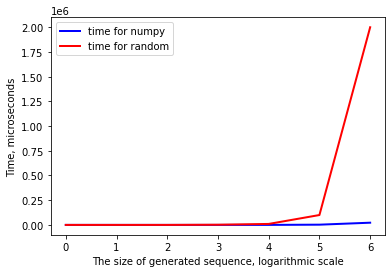

In [45]:
plt.figure()
plt.xlabel('The size of generated sequence, logarithmic scale')
plt.ylabel('Time, microseconds')
plt.plot(np_times, color='blue', lw=2, label = 'time for numpy')
plt.plot(random_times, color='red', lw=2, label = 'time for random')
plt.legend()
plt.show()

### Monkey sort

Checking if the container is sorted

In [46]:
def is_sorted(a):
    status = True
    for i in range(len(a)-1):
        if a[i] > a[i+1]:
            status = False
            break
    return status

Realizing monkey sorting

In [47]:
def mixed(a):
    return np.random.choice(a, size = len(a), replace = False)
def monkey_sort(a):
    while not is_sorted(a):
        a = mixed(a)
    return a

In [48]:
monkey_size = list(range(1, 11))
monkey_times = []
sd = []
for i in monkey_size:
    task = mixed(list(range(1, i)))
    times_i = []
    for j in range(5):
        start_time = datetime.now()
        monkey_sort(task)
        times_i.append(((datetime.now() - start_time).microseconds)*i)
    monkey_times.append(np.mean(times_i))
    sd.append(np.std(times_i))

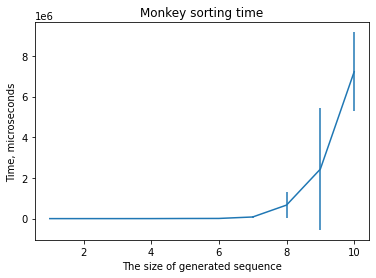

In [49]:
plt.figure()
plt.title('Monkey sorting time')
plt.xlabel('The size of generated sequence')
plt.ylabel('Time, microseconds')
plt.errorbar(monkey_size, monkey_times, sd)
plt.show()

### Random walk

In [50]:
def random_walk(number_of_steps):
    x = [0]
    y = [0]
    opportunities = ('left', 'right', 'up', 'down')
    for i in range(number_of_steps):
        step = np.random.choice(opportunities)
        if step == 'left':
            x.append(x[-1]-1)
            y.append(y[-1])
        elif step == 'right':
            x.append(x[-1]+1)
            y.append(y[-1])
        elif step == 'up':
            x.append(x[-1])
            y.append(y[-1]+1)
        else:
            x.append(x[-1])
            y.append(y[-1]-1)
    return [x, y]

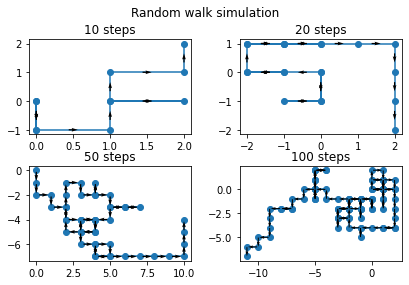

In [51]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
plt.suptitle('Random walk simulation')
fig.tight_layout()

walk = random_walk(10)
df = pd.DataFrame.from_dict({'x' : walk[0],'y' : walk[1]})
x = df['x'].values
y = df['y'].values
u = np.diff(x)
v = np.diff(y)
pos_x = x[:-1] + u/2
pos_y = y[:-1] + v/2
norm = np.sqrt(u**2+v**2) 
axes[0][0].plot(x,y, marker="o")
axes[0][0].quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid")
axes[0][0].set_title('10 steps')

walk2 = random_walk(20)
df2 = pd.DataFrame.from_dict({'x2' : walk2[0], 'y2' : walk2[1]})
x2 = df2['x2'].values
y2 = df2['y2'].values
u2 = np.diff(x2)
v2 = np.diff(y2)
pos_x2 = x2[:-1] + u2/2
pos_y2 = y2[:-1] + v2/2
norm2 = np.sqrt(u2**2+v2**2) 
axes[0][1].plot(x2,y2, marker="o")
axes[0][1].quiver(pos_x2, pos_y2, u2/norm2, v2/norm2, angles="xy", zorder=5, pivot="mid")
axes[0][1].set_title('20 steps')

walk3 = random_walk(50)
df3 = pd.DataFrame.from_dict({'x3' : walk3[0], 'y3' : walk3[1]})
x3 = df3['x3'].values
y3 = df3['y3'].values
u3 = np.diff(x3)
v3 = np.diff(y3)
pos_x3 = x3[:-1] + u3/2
pos_y3 = y3[:-1] + v3/2
norm3 = np.sqrt(u3**2+v3**2) 
axes[1][0].plot(x3,y3, marker="o")
axes[1][0].quiver(pos_x3, pos_y3, u3/norm3, v3/norm3, angles="xy", zorder=5, pivot="mid")
axes[1][0].set_title('50 steps')

walk4 = random_walk(100)
df4 = pd.DataFrame.from_dict({'x4' : walk4[0], 'y4' : walk4[1]})
x4 = df4['x4'].values
y4 = df4['y4'].values
u4 = np.diff(x4)
v4 = np.diff(y4)
pos_x4 = x4[:-1] + u4/2
pos_y4 = y4[:-1] + v4/2
norm4 = np.sqrt(u4**2+v4**2) 
axes[1][1].plot(x4,y4, marker="o")
axes[1][1].quiver(pos_x4, pos_y4, u4/norm4, v4/norm4, angles="xy", zorder=5, pivot="mid")
axes[1][1].set_title('100 steps')

plt.show()

### Sierpinski triangle

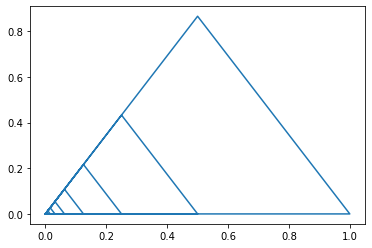

In [52]:
def s_triangle(length, x_start, y_start, depth):
    x = x_start
    y = y_start
    x.append(x[-1] + length)
    y.append(y[-1])
    x.append(x[-2]+length/2)
    y.append(y[-1]+((3)**0.5)*length/2)
    x.append(x[-3])
    y.append(y[-3])
    if length >= depth:
        s_triangle(length/2, x, y, depth)
    else:
        plt.figure()
        plt.plot(x, y)
        plt.show()

s_triangle(1, [0], [0], 0.005)

I managed to do this ^ and got tired. I'm sorry

### Still readable

In [68]:
def still_readable_text(text):
    words = text.split()
    new_text = []
    for word in words:
        word = list(word)
        status = ''
        if word[-1] in ['.', ',', '-', ':', ';', '!', '?']:
            if len(word) >= 3 and word[-2] == '.':
                status = '...'
                word = word[:-3]
            elif status == '-':
                new_text.append('- ')
            else:
                status = word[-1]
                word = word[:-1]
        if len(word) == 1:
            new_text.append(word[0])
        elif len(word) == 2:
            for letter in word:
                new_text.append(letter)
        else:
            new_text.append(word[0])
            word = word[1:]
            last_letter = word[-1]
            word = word[:-1]
            word = mixed(word) #the function from the second task
            for letter in word:
                new_text.append(letter)
            new_text.append(last_letter)
        new_text.append(status)
        new_text.append(' ')
    print(*new_text, sep = '')

In [69]:
still_readable_text('Surprisingly I still can read this. I am a genius...')

Sligirrpsnuy I sltil can raed tihs. I am a gniues... 
